<a href="https://colab.research.google.com/github/Shruti002/HR_Analytics/blob/main/EmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of EMPLOYEE ATTRITION

ATTRITION RATE-> Speed at which the workforce of a company is DECREASING.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

#Load DATA FILE (spread sheet)

In [ ]:
a='/content/HR_Analytics.csv'
df=pd.read_csv(a)
df.head(7)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,3,80,0,0,5,4,0,0,0,0.0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,...,3,80,0,0,2,4,0,0,0,0.0


In [ ]:
#to view all cols
pd.set_option('display.max_columns',None)
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [ ]:
#to view all the data-types of cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [ ]:
#get no of rows and cols
df.shape

(1480, 38)

In [ ]:
#get the column data types
df.dtypes

EmpID                        object
Age                           int64
AgeGroup                     object
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
SalarySlab                   object
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           

In [ ]:
#Check & remove duplicates
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)

False    1473
True        7
Name: count, dtype: int64


In [ ]:
#get count of empty valye for each col
df.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.0,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.0,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1416.000000
mean,36.917176,802.659878,9.196877,2.911066,1.0,1026.975560,2.723693,65.833673,2.729803,2.063815,2.728445,6500.228785,14321.376103,2.693143,15.212492,3.153428,2.712152,80.0,0.793618,11.277665,2.800407,2.761711,7.004752,4.228106,2.183978,4.117232
std,9.130690,403.245460,8.107754,1.024612,0.0,603.223162,1.093006,20.350032,0.712115,1.106429,1.103163,4706.053923,7115.540450,2.496914,3.657230,0.360522,1.081575,0.0,0.851493,7.776228,1.289411,0.705838,6.121004,3.621096,3.220301,3.559344
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,492.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8053.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1024.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4908.000000,14242.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1558.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8380.000000,20467.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# count of the no. of emp who stayes and left:


ATTRITION -

YES --> Employees who have left

NO--> Employees who are still working

In [ ]:
df['Attrition'].value_counts()
#1242 - still working
#237- left

Attrition
No     1236
Yes     237
Name: count, dtype: int64

exploratory dataanalysis

In [ ]:
df.groupby(['Gender','Attrition']).size()

Gender  Attrition
Female  No           502
        Yes           87
Male    No           734
        Yes          150
dtype: int64

In [ ]:
#TOTAL ATTRITION RATE
(87+150)/(502+734)
#19.2%

0.19174757281553398

In [ ]:
#Female Attrition rate
87/(502+87)
#14.8 attritation in female

0.14770797962648557

In [ ]:
#Male Attrition rate
150/(734+150)
#16.9 attritation in male

0.16968325791855204

<Axes: xlabel='count', ylabel='Attrition'>

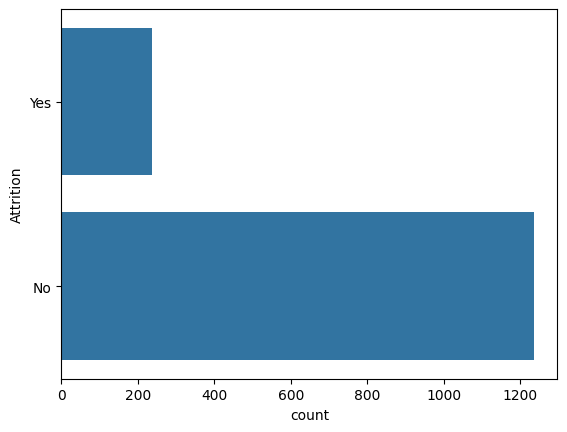

In [ ]:
#visualize the no of empolyes that stayes and left
sns.countplot(df['Attrition'])

In [ ]:
#Percentage if we had guessed the attrition
(1242-237)/1242

0.8091787439613527

<Axes: xlabel='Age', ylabel='count'>

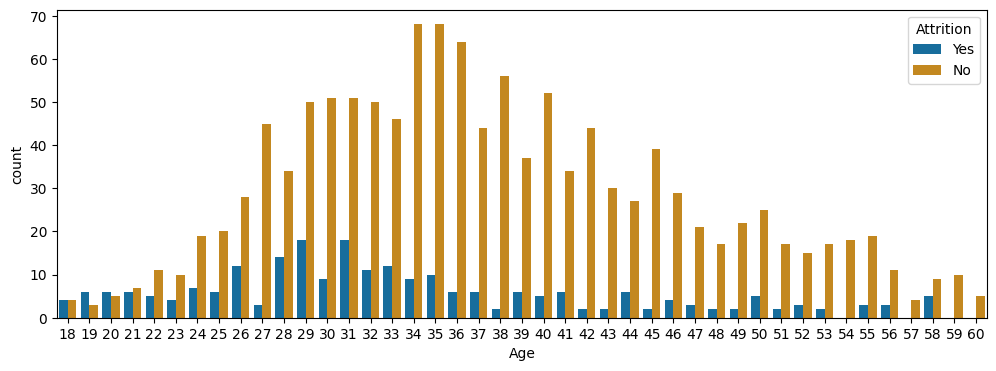

In [ ]:
#SHOW the no of employees that left and stayed by AGE
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x='Age',hue='Attrition', data=df,palette='colorblind')

In [ ]:
#PRINT ALL OF THE DATA TYPES AND THEIR UNIQUE VALUES
for column in df.columns:
  if df[column].dtype==object:
    print(str(column)+':'+ str(df[column].unique()))
    print(df[column].value_counts())
    print('--------------------------------------')

EmpID:['RM297' 'RM302' 'RM458' ... 'RM537' 'RM880' 'RM1210']
EmpID
RM1467    2
RM1466    2
RM1465    2
RM297     1
RM958     1
         ..
RM757     1
RM693     1
RM683     1
RM657     1
RM1210    1
Name: count, Length: 1470, dtype: int64
--------------------------------------
AgeGroup:['18-25' '26-35' '36-45' '46-55' '55+']
AgeGroup
26-35    607
36-45    470
46-55    226
18-25    123
55+       47
Name: count, dtype: int64
--------------------------------------
Attrition:['Yes' 'No']
Attrition
No     1236
Yes     237
Name: count, dtype: int64
--------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' 'TravelRarely']
BusinessTravel
Travel_Rarely        1038
Travel_Frequently     278
Non-Travel            150
TravelRarely            7
Name: count, dtype: int64
--------------------------------------
Department:['Research & Development' 'Sales' 'Human Resources']
Department
Research & Development    963
Sales                     447
Human Resour

#REMOVE SOME USELESS COLS
df=df.drop('Over18', axis=1)


In [ ]:
#REMOVE SOME USELESS COLS
if 'Over18' in df.columns:
    df = df.drop('Over18', axis=1)
if 'EmployeeNumber' in df.columns:
    df = df.drop('EmployeeNumber', axis=1)

if 'StandardHours' in df.columns:
    df = df.drop('StandardHours', axis=1)
if 'EmployeeCount' in df.columns:
    df = df.drop('EmployeeCount', axis=1)

df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,No,13,3,3,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,No,12,3,1,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Yes,14,3,4,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,No,15,3,4,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,No,12,3,4,0,0,0,3,0,0,0,0.0


In [ ]:
#Get the correlation

# Convert non-numerical columns to numerical if they represent categories
for column in df.columns:
    if df[column].dtype == object:
        try:
            df[column] = df[column].astype(float)  # Attempt to convert to numerical
        except ValueError:
            print(f"Column '{column}' could not be converted to numerical. Encoding as categories.")
            df[column] = df[column].astype('category').cat.codes  # Encode as categories

# Now calculate the correlation
df.corr()


Column 'EmpID' could not be converted to numerical. Encoding as categories.
Column 'AgeGroup' could not be converted to numerical. Encoding as categories.
Column 'Attrition' could not be converted to numerical. Encoding as categories.
Column 'BusinessTravel' could not be converted to numerical. Encoding as categories.
Column 'Department' could not be converted to numerical. Encoding as categories.
Column 'EducationField' could not be converted to numerical. Encoding as categories.
Column 'Gender' could not be converted to numerical. Encoding as categories.
Column 'JobRole' could not be converted to numerical. Encoding as categories.
Column 'MaritalStatus' could not be converted to numerical. Encoding as categories.
Column 'SalarySlab' could not be converted to numerical. Encoding as categories.
Column 'OverTime' could not be converted to numerical. Encoding as categories.


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmpID,1.000000,0.000898,0.001704,0.022033,-0.019702,-0.036049,0.026822,0.007246,-0.049350,-0.016694,0.048963,-0.049374,-0.033806,-0.005260,0.040994,0.028569,0.032499,-0.010071,0.043227,-0.043422,-0.029794,0.006331,0.039732,-0.028653,-0.032691,-0.029666,-0.006608,0.018609,-0.020905,0.015264,0.029948,0.012463,0.024100,0.017707
Age,0.000898,1.000000,0.951891,-0.158775,0.025314,0.009831,-0.033021,-0.001441,0.207328,-0.041840,0.009346,-0.035192,0.025559,0.030303,0.509977,-0.123481,-0.005404,-0.095947,0.498078,-0.465923,0.027386,0.300230,0.028493,0.002969,0.002212,0.052204,0.038256,0.680300,-0.018831,-0.021722,0.311535,0.213357,0.216867,0.210786
AgeGroup,0.001704,0.951891,1.000000,-0.148801,0.024987,0.021925,-0.031336,-0.020267,0.196455,-0.039795,0.005072,-0.044104,0.026169,0.021140,0.481737,-0.117252,-0.011535,-0.098196,0.472219,-0.444490,0.015013,0.307537,0.021550,0.003581,0.007516,0.033545,0.045492,0.659866,-0.029699,-0.043710,0.288951,0.201588,0.205622,0.200608
Attrition,0.022033,-0.158775,-0.148801,1.000000,0.028487,-0.056809,0.063802,0.077585,-0.030526,0.026091,-0.104022,0.029298,-0.005593,-0.129678,-0.168926,0.067401,-0.103276,0.161664,-0.159458,0.125195,0.014647,0.043469,0.246532,-0.013827,0.003268,-0.045763,-0.136939,-0.170847,-0.059769,-0.064221,-0.134106,-0.160302,-0.032487,-0.161636
BusinessTravel,-0.019702,0.025314,0.024987,0.028487,1.000000,-0.007885,-0.003540,-0.025758,-0.000703,0.014969,0.006646,-0.042629,0.021017,0.037323,0.020625,0.008715,-0.032657,0.030459,0.034472,-0.020706,-0.011660,0.017582,0.026756,-0.021362,-0.020505,-0.034042,-0.018922,0.039878,0.018574,-0.013211,-0.009807,-0.008994,-0.026782,-0.021219
DailyRate,-0.036049,0.009831,0.021925,-0.056809,-0.007885,1.000000,0.008050,-0.004936,-0.016249,0.038370,0.018710,-0.012601,0.022450,0.045978,0.002095,-0.008125,0.031329,-0.068740,0.006887,-0.006637,-0.031897,0.037360,0.008857,0.023243,0.000289,0.009106,0.041497,0.014202,0.001544,-0.037684,-0.034384,0.009217,-0.033597,-0.023380
Department,0.026822,-0.033021,-0.031336,0.063802,-0.003540,0.008050,1.000000,0.016259,0.008985,0.014571,-0.018726,-0.043222,-0.005006,-0.025752,0.100642,0.662764,0.021329,0.057264,0.052369,-0.082924,0.024309,-0.037209,0.007295,-0.007250,-0.024698,-0.020790,-0.013229,-0.016659,0.035588,0.026452,0.022541,0.055607,0.039718,0.034203
DistanceFromHome,0.007246,-0.001441,-0.020267,0.077585,-0.025758,-0.004936,0.016259,1.000000,0.020427,0.002049,-0.016472,-0.000691,0.030552,0.011455,0.005338,-0.002186,-0.001994,-0.014967,-0.017885,-0.011524,0.026476,-0.028356,0.025137,0.040492,0.026845,0.006854,0.045349,0.005834,-0.036918,-0.026341,0.009290,0.018115,0.009566,0.012965
Education,-0.049350,0.207328,0.196455,-0.030526,-0.000703,-0.016249,0.008985,0.020427,1.000000,-0.040483,-0.028630,-0.018106,0.018839,0.042461,0.100291,0.007200,-0.009961,0.004367,0.094285,-0.099308,-0.027070,0.125016,-0.019145,-0.011270,-0.023726,-0.007177,0.017881,0.147879,-0.027329,0.009191,0.069176,0.059486,0.054994,0.069652
EducationField,-0.016694,-0.041840,-0.039795,0.026091,0.014969,0.038370,0.014571,0.002049,-0.040483,1.000000,0.044678,-0.002968,-0.024372,-0.003274,-0.045429,0.015762,-0.034267,0.015403,-0.041719,0.024837,-0.025978,-0.009214,0.001213,-0.010354,-0.006316,-0.003809,-0.016814,-0.028365,0.049260,0.041714,-0.019240,-0.010986,0.001315,-0.004977


<Axes: >

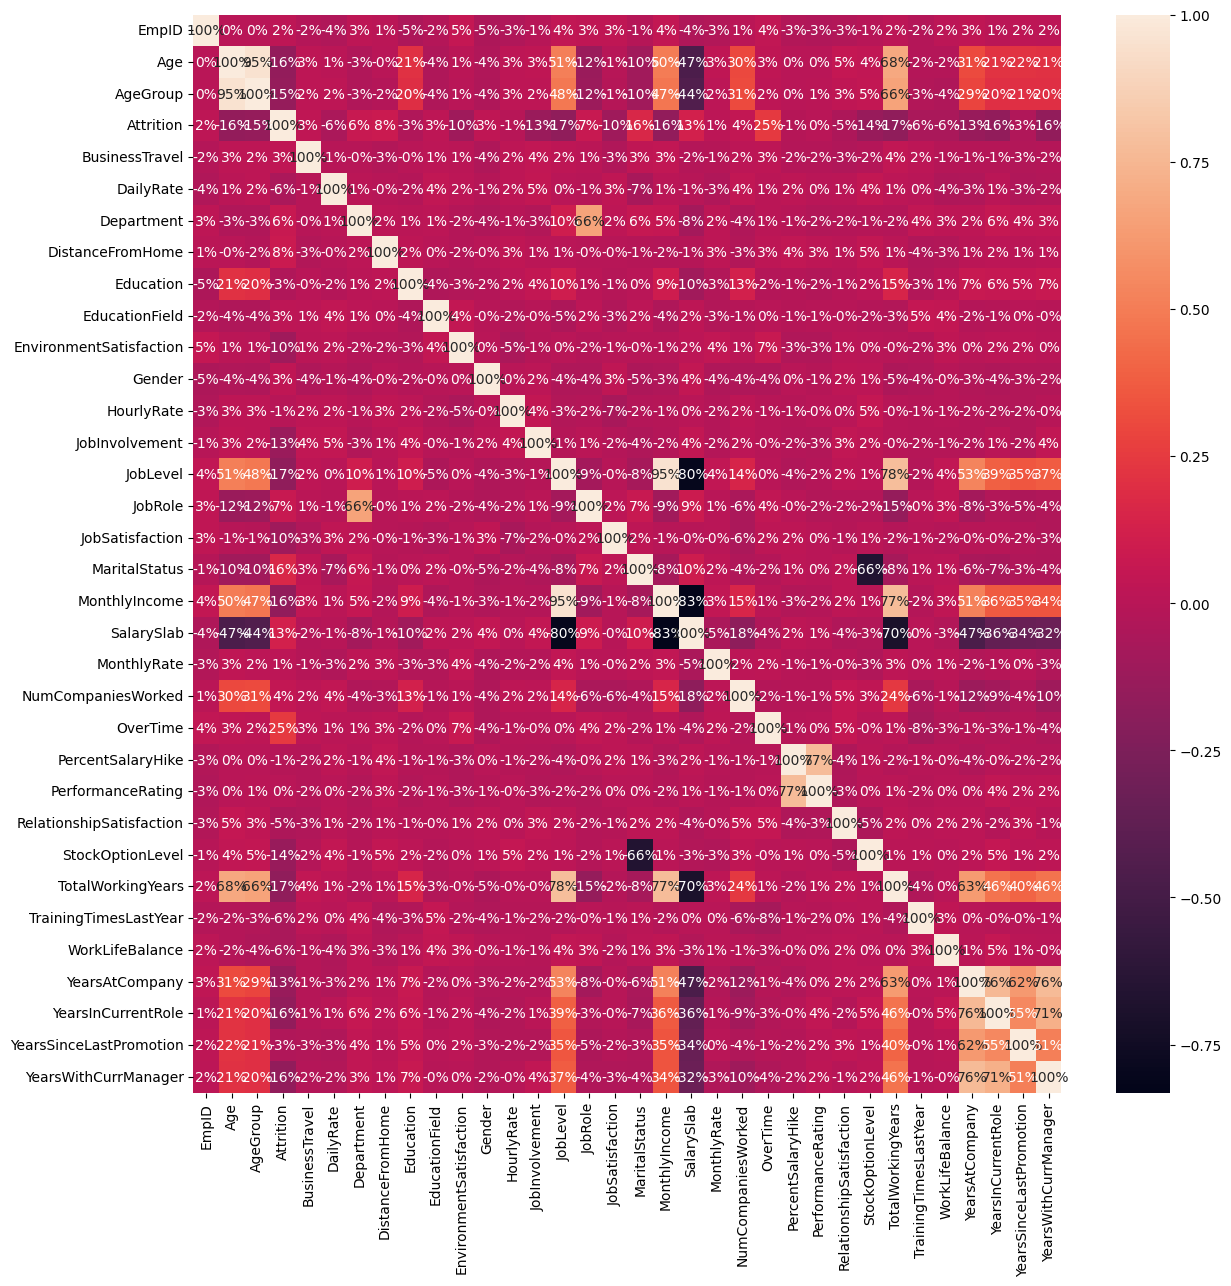

In [ ]:
#visuLIZE the correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [ ]:
#Transform the data
#non numeric -> to numeric cols
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype==np.number:
    continue

  df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-24-512cf475aea8>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-24-512cf475aea8>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-24-512cf475aea8>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-24-512cf475aea8>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-24-512cf475aea8>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. Th

#WE NEED TO MAKE 'AGE' as 1st col

so dropping age and emp_id

In [ ]:
if 'Age' in df.columns:  # Check if 'Age' column exists
    df['Age_Years'] = df['Age']
    #dropping AGE
    df = df.drop('Age', axis=1)
df

,EmpID,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,767,0,1,3,84,1,2,2,1,2,1,24,2,0,2,2,2,17,3,1341,1,0,2,0,2,0,0,2,2,0,0,0,0.0,0
1,772,0,0,3,454,2,9,2,3,3,0,39,1,0,8,2,2,8,3,448,1,0,1,0,0,0,0,2,2,0,0,0,0.0,0
2,928,0,1,2,756,2,4,2,2,1,1,39,2,0,8,1,2,30,3,355,1,1,3,0,3,0,0,3,2,0,0,0,0.0,0
3,1198,0,0,0,118,1,4,1,1,1,1,43,2,0,6,3,2,1,3,660,1,0,4,0,3,0,0,2,2,0,0,0,0.0,0
4,1299,0,1,0,94,1,7,0,3,2,1,50,2,0,2,2,2,31,3,668,1,0,1,0,3,0,0,0,2,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,882,4,0,3,197,1,6,2,1,0,0,11,2,4,3,0,1,1330,1,99,5,0,0,0,3,0,33,5,0,28,8,11,10.0,42
1476,898,4,0,2,885,2,27,2,2,2,0,50,1,2,7,0,1,1083,0,36,4,0,8,0,3,0,22,5,3,18,13,13,11.0,42
1477,1007,4,0,3,671,2,15,3,2,0,1,54,2,1,7,0,2,733,2,574,8,0,3,0,3,0,10,1,2,2,2,2,2.0,42
1478,1350,4,0,3,386,2,6,3,2,1,1,22,3,1,7,3,0,698,2,519,0,1,7,0,1,1,12,3,2,11,7,1,9.0,42


In [ ]:
if 'EmpID' in df.columns:
  df['EmpId'] = df['EmpID']
  df = df.drop('EmpID', axis=1)
df

,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years,EmpId
0,0,1,3,84,1,2,2,1,2,1,24,2,0,2,2,2,17,3,1341,1,0,2,0,2,0,0,2,2,0,0,0,0.0,0,767
1,0,0,3,454,2,9,2,3,3,0,39,1,0,8,2,2,8,3,448,1,0,1,0,0,0,0,2,2,0,0,0,0.0,0,772
2,0,1,2,756,2,4,2,2,1,1,39,2,0,8,1,2,30,3,355,1,1,3,0,3,0,0,3,2,0,0,0,0.0,0,928
3,0,0,0,118,1,4,1,1,1,1,43,2,0,6,3,2,1,3,660,1,0,4,0,3,0,0,2,2,0,0,0,0.0,0,1198
4,0,1,0,94,1,7,0,3,2,1,50,2,0,2,2,2,31,3,668,1,0,1,0,3,0,0,0,2,0,0,0,0.0,0,1299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,4,0,3,197,1,6,2,1,0,0,11,2,4,3,0,1,1330,1,99,5,0,0,0,3,0,33,5,0,28,8,11,10.0,42,882
1476,4,0,2,885,2,27,2,2,2,0,50,1,2,7,0,1,1083,0,36,4,0,8,0,3,0,22,5,3,18,13,13,11.0,42,898
1477,4,0,3,671,2,15,3,2,0,1,54,2,1,7,0,2,733,2,574,8,0,3,0,3,0,10,1,2,2,2,2,2.0,42,1007
1478,4,0,3,386,2,6,3,2,1,1,22,3,1,7,3,0,698,2,519,0,1,7,0,1,1,12,3,2,11,7,1,9.0,42,1350


In [ ]:
if 'AgeGroup' in df.columns:
  df['Age_Group'] = df['AgeGroup']
  df = df.drop('AgeGroup', axis=1)
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years,EmpId,Age_Group
0,1,3,84,1,2,2,1,2,1,24,2,0,2,2,2,17,3,1341,1,0,2,0,2,0,0,2,2,0,0,0,0.0,0,767,0
1,0,3,454,2,9,2,3,3,0,39,1,0,8,2,2,8,3,448,1,0,1,0,0,0,0,2,2,0,0,0,0.0,0,772,0
2,1,2,756,2,4,2,2,1,1,39,2,0,8,1,2,30,3,355,1,1,3,0,3,0,0,3,2,0,0,0,0.0,0,928,0
3,0,0,118,1,4,1,1,1,1,43,2,0,6,3,2,1,3,660,1,0,4,0,3,0,0,2,2,0,0,0,0.0,0,1198,0
4,1,0,94,1,7,0,3,2,1,50,2,0,2,2,2,31,3,668,1,0,1,0,3,0,0,0,2,0,0,0,0.0,0,1299,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,0,3,197,1,6,2,1,0,0,11,2,4,3,0,1,1330,1,99,5,0,0,0,3,0,33,5,0,28,8,11,10.0,42,882,4
1476,0,2,885,2,27,2,2,2,0,50,1,2,7,0,1,1083,0,36,4,0,8,0,3,0,22,5,3,18,13,13,11.0,42,898,4
1477,0,3,671,2,15,3,2,0,1,54,2,1,7,0,2,733,2,574,8,0,3,0,3,0,10,1,2,2,2,2,2.0,42,1007,4
1478,0,3,386,2,6,3,2,1,1,22,3,1,7,3,0,698,2,519,0,1,7,0,1,1,12,3,2,11,7,1,9.0,42,1350,4


#Split the data

In [ ]:
X=df.iloc[:,1:df.shape[1]].values
Y=df.iloc[:,0].values

75% TRAINING

25% TESTING

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train ,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#Model : RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an imputer to fill missing values with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:

# Oversample the minority class using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),param_grid, scoring='recall_macro', cv=5)
grid_search.fit(X_train_res, y_train_res)

# Best model from grid search
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

SCORE-> ***98.4***% ->PERFORMANCE

In [ ]:
#Get the accuracy on the training data set
forest.score(X_train,Y_train)
#98.4% accuracy

0.9846014492753623

ACCURACY-> 85% -->

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=forest.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
# Print the accuracy score
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


Recall vaule :

In [ ]:
from sklearn.metrics import recall_score, f1_score
#threshold adjust 29
y_prob = best_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_prob >=0.29).astype(int)

recall = recall_score(Y_test, y_pred_adjusted, average='macro')
print(f'Recall: {recall:.2f}')

Recall: 0.76


F1 Score :

In [ ]:
f1 = f1_score(Y_test, y_pred_adjusted, average='macro')
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.70


R2 SCORE :

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
# Print the R² score
print('R² Score:' ,r2)

R² Score: -0.08021077283372335


In [ ]:
#Show the confusion matrix and accurace
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,forest.predict(X_test))
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(cm)
print("MODEL TESTING ACCURACY={}".format((TP+TN)/(TP+TN+FN+FP)))

[[304   4]
 [ 51  10]]
MODEL TESTING ACCURACY=0.8509485094850948
